# The Heisenberg Model (3D Spins)

In [1]:
include("../src/heisenberg.jl")
import CairoMakie as cm
import LsqFit as lsq
using JLD2
using ProgressMeter
import StatsBase as sb
import Distributions as dist

## Task 1: find the critical temperature
Todo: fit susceptibility with a bell curve to get the peak position ($T_c$)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:03


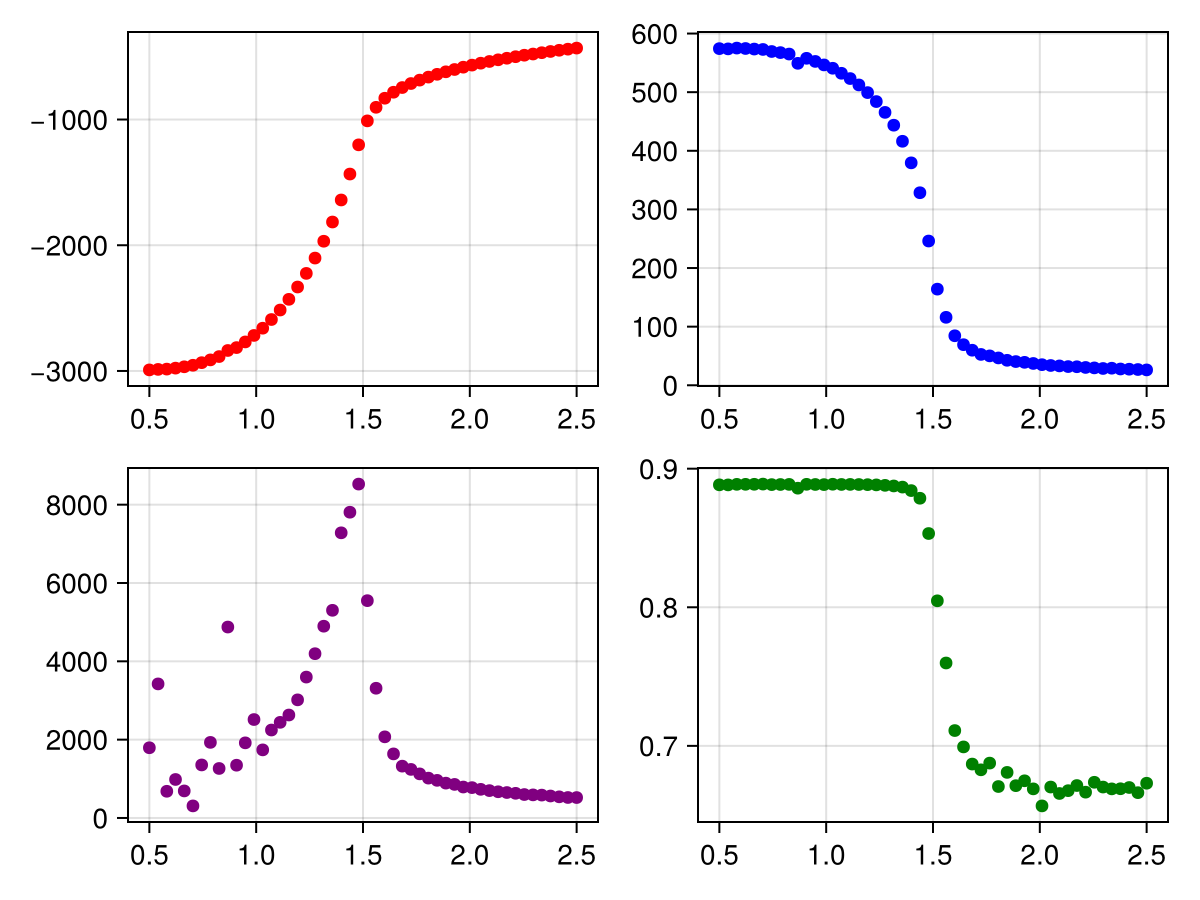

In [2]:
# using metropolis
temps, energies, magnetisations, binder_cumulants = temp_sweep(grid_size=10,T_min=0.5,T_max=2.5, T_Steps=50,mc_algo=metropolis_step)
fig = cm.Figure()
cm.plot(fig[1, 1], temps, energies[1], color=:red, label="Energy")
cm.plot(fig[1, 2], temps, magnetisations[1], color=:blue, label="Magnetisation")
cm.plot(fig[2, 1], temps, energies[2].^2 ./temps, color=:purple, label="Susceptibility")
cm.plot(fig[2, 2], temps, binder_cumulants, color=:green, label="Binder Cumulant")
fig

Progress: 100%|█████████████████████████████████████████| Time: 0:03:51


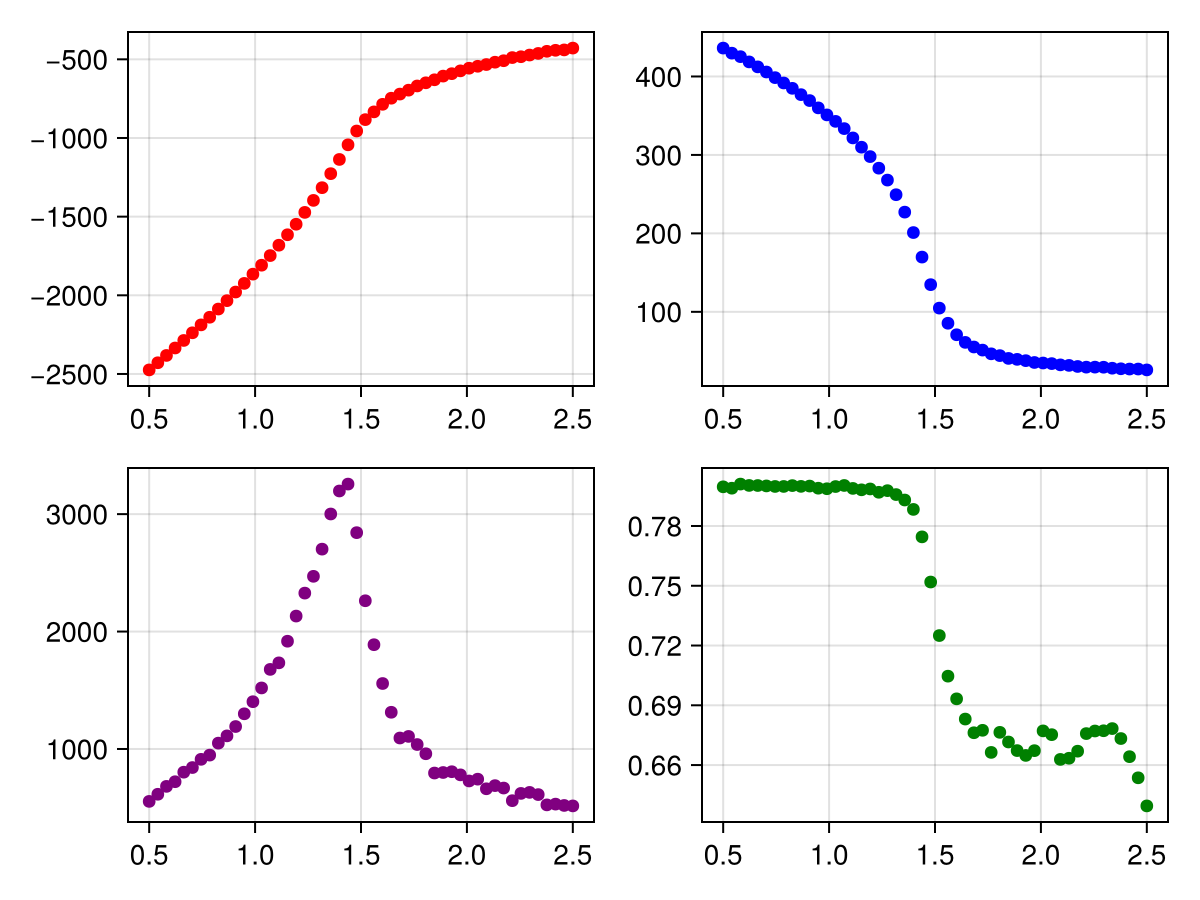

In [3]:
# using Wolff
temps, energies, magnetisations, binder_cumulants = temp_sweep(grid_size=10,T_min=0.5,T_max=2.5, T_Steps=50,mc_algo=wolff_step, N_Subsweep=10)
fig = cm.Figure()
cm.plot(fig[1, 1], temps, energies[1], color=:red, label="Energy")
cm.plot(fig[1, 2], temps, magnetisations[1], color=:blue, label="Magnetisation")
cm.plot(fig[2, 1], temps, energies[2].^2 ./temps, color=:purple, label="Susceptibility")
cm.plot(fig[2, 2], temps, binder_cumulants, color=:green, label="Binder Cumulant")
fig

## Task 2: Autocorrelation time and it's critical exponent